<a href="https://colab.research.google.com/github/KU-ZHANGZIYUE/RainfallForecasting_ConvEncDec/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#Prediction
#Author: ZHANG Ziyue (Kyoto University)
#Date: 2011/11/4

from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Research/30mins_5ch

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Research/30mins_5ch


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

In [3]:
model = load_model('Unet_30mins_5ch_100ep_nodrop.h5')
input_dataset = np.load('paddedinput_30mins_5ch.npy')
output_dataset = np.load('paddedoutput_30mins_5ch.npy')

In [4]:
#Predict
def pred_to_pad(pred, from_shape_w=192, to_shape_w=180, from_shape_h=128, to_shape_h=120):
    # pred shape 12,928,928
    padding_w = int( (from_shape_w - to_shape_w) / 2)
    padding_h = int( (from_shape_h - to_shape_h) / 2)
    return pred[::, padding_w:padding_w+to_shape_w, padding_h:padding_h+to_shape_h].copy()

prediction = pred_to_pad(model.predict(input_dataset))

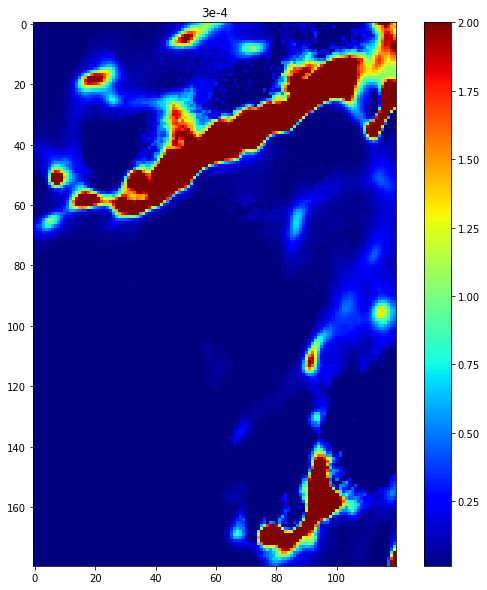

In [5]:
#Show prediction on specific frame

frame = 530


plt.figure(figsize = (10,10))
plt.title("3e-4")
plt.imshow(prediction[frame,:,:,0], cmap = 'jet', vmax = 2)
plt.colorbar()

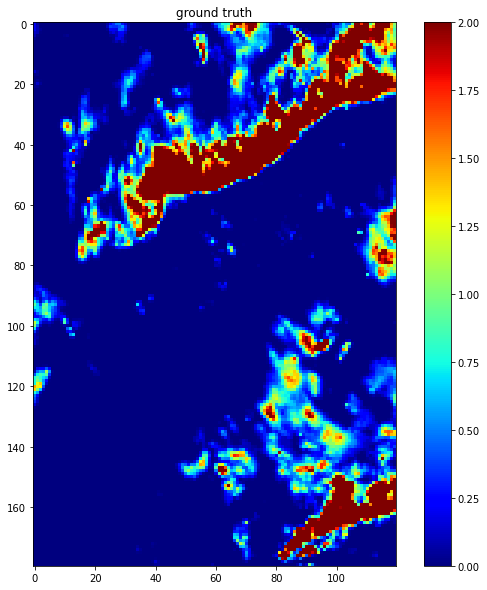

In [6]:
depad_output = pred_to_pad(output_dataset)

plt.figure(figsize = (10,10))
plt.title("ground truth")
plt.imshow(depad_output[frame,:,:,0], cmap = 'jet', vmax = 2)
plt.colorbar()


Text(0.5, 1.0, 't')

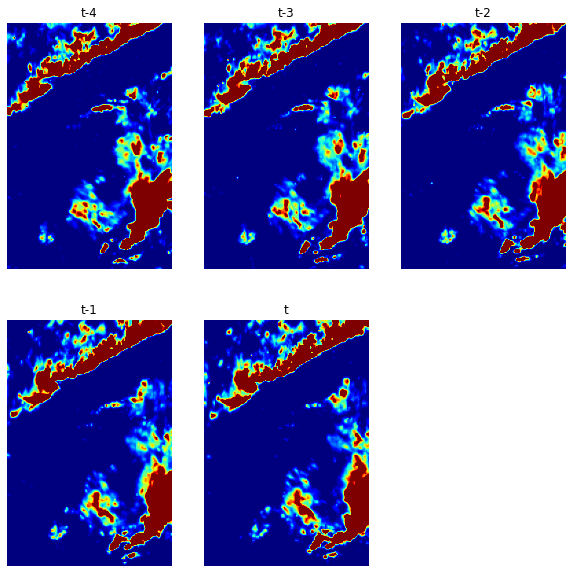

In [7]:
#Display input
depad_input = pred_to_pad(input_dataset)
rows = 2
columns = 3

# reading images
Image1 = depad_input[frame,:,:,0]
Image2 = depad_input[frame,:,:,1]
Image3 = depad_input[frame,:,:,2]
Image4 = depad_input[frame,:,:,3]
Image5 = depad_input[frame,:,:,4]


fig = plt.figure(figsize=(10, 10))
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(Image1, cmap = 'jet', vmax = 2, vmin = 0)
plt.axis('off')
plt.title("t-4")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
plt.imshow(Image2, cmap = 'jet', vmax = 2, vmin = 0)
plt.axis('off')
plt.title("t-3")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
plt.imshow(Image3, cmap = 'jet', vmax = 2, vmin = 0)
plt.axis('off')
plt.title("t-2")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
plt.imshow(Image4, cmap = 'jet', vmax = 2, vmin = 0)
plt.axis('off')
plt.title("t-1")

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)
plt.imshow(Image5, cmap = 'jet', vmax = 2, vmin = 0)
plt.axis('off')
plt.title("t")


In [8]:
#Calculating RMSE for 70 frames
from sklearn.metrics import mean_squared_error
error = 0

for i in range(550):
  if i < 480:
    error = error
  if i >= 480:
    error = error + np.sqrt(mean_squared_error(prediction[i,:,:,0], depad_output[i,:,:,0]))
print(error)


178.78905461485098


(480.0, 550.0)

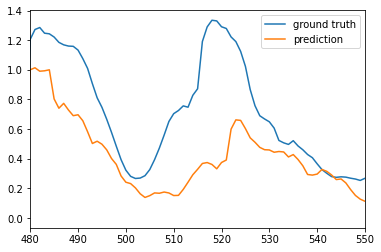

In [22]:
def rain_intensity(data):
  intensity = np.zeros((len(data)))
  for i in range(len(data)):
    single_frame = 0
    if i < 480:
      single_frame = single_frame
    if i >= 480:
      for j in range(180):
        for k in range(120):                      #WHY DONT I JUST USE SUM????????????????????????  np.sum(data[0,:,:])
          single_frame = single_frame + data[i,j,k]
      intensity[i] = single_frame/180/120   #spatial average
  return intensity

plt.plot(rain_intensity(depad_output), label='ground truth')
plt.plot(rain_intensity(prediction), label='prediction')
plt.legend()
plt.xlim(480, 550)

In [ ]:
np.array_equal(depad_input[frame,:,:,4], depad_output[frame-6,:,:,0])

True